# Build  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 30th 2021
- version v0

# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

# Logbook for file selection

In [4]:
filename_logbook='logbooks/auxtellogbook_2021_v1.csv'

In [5]:
df=pd.read_csv(filename_logbook)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
df

,Unnamed: 0,index,date,path,file,num,object,filter,disperser,airmass,exposure,focus,seeing,pressure,temperature,humidity,windspd
0,0,0,2021-02-17T01:45:09.091,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_RG610_HD50896_2021-02-16_181.fits,181,HD50896,RG610,holo4_003,1.006209,90.0,-0.034843,NaN,743.10,10.3,51.0,9.3
1,1,1,2021-02-17T03:37:12.647,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_empty_HD50896_2021-02-16_209.fits,209,HD50896,empty_1,holo4_003,1.099905,90.0,0.000000,NaN,742.80,10.4,45.0,9.9
2,2,2,2021-02-18T07:25:02.387,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_350.fits,350,NGC4755,empty_1,holo4_003,1.158253,6.0,0.000000,NaN,742.30,8.8,53.0,7.3
3,3,3,2021-02-18T07:25:46.560,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_351.fits,351,NGC4755,empty_1,holo4_003,1.158097,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
4,4,4,2021-02-18T07:26:07.146,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_352.fits,352,NGC4755,empty_1,holo4_003,1.158027,6.0,0.000000,NaN,742.30,8.8,54.0,6.3
5,5,5,2021-02-18T07:26:18.957,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_353.fits,353,NGC4755,empty_1,holo4_003,1.157987,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
6,6,6,2021-02-18T07:26:43.049,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_354.fits,354,NGC4755,empty_1,holo4_003,1.157907,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
7,7,7,2021-02-18T07:26:51.615,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_355.fits,355,NGC4755,empty_1,holo4_003,1.157879,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
8,8,8,2021-02-18T07:27:00.190,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_356.fits,356,NGC4755,empty_1,holo4_003,1.157851,6.0,0.000000,NaN,742.30,8.8,55.0,7.7
9,9,9,2021-02-18T07:27:53.863,/sps/lsst/groups/auxtel/data/2021/holo/FlipCleans,Cor_holo4_003_NGC4755_2021-02-17_357.fits,357,NGC4755,empty_1,holo4_003,1.157723,6.0,0.000000,NaN,742.25,8.7,55.0,6.7


# Selection of input file

In [8]:
dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"

In [9]:
#filename_image="Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits"

In [81]:
filename_image=df['file'][36]

In [82]:
filename_image

'Cor_holo4_003_empty_HD60753_2021-02-18_582.fits'

In [83]:
filename=os.path.join(dir_spectra,filename_image)
output_directory="./outputs/"
guess = [250,2600]
disperser_label = "holo4_003"
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = "HD60753"

# Configuration of the running mode

In [84]:
parameters.debug=True
parameters.verbose=True
parameters.display=True

# Load an image

In [85]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

2021-03-30 18:34:40  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_empty_HD60753_2021-02-18_582.fits...


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-03-30 18:34:40  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-03-30 18:34:40  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-03-30 18:34:40  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/holo4_003
2021-03-30 18:34:40  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 100.00 +/- 1.00 grooves/mm
	Average tilt of 0.0 degrees
2021-03-30 18:34:45  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.315372257450537 but average of self.read_out_noise is 8.5.
2021-03-30 18:34:45  Star       load                 INFO   
	Simbad:
 MAIN_ID        RA           DEC      ... PM_ERR_ANGLE_10 Z_VALUE_10
             "h:m:s"       "d:m:s"    ...       deg                 
--------- ------------- ------------- ... --------------- ----

## Show relevant parameters

In [86]:
parameters.OBS_NAME

'AUXTEL'

In [87]:
parameters.DISTANCE2CCD

174.9980010986328

In [73]:
parameters.LAMBDA_MIN 

300

In [74]:
parameters.LAMBDA_MAX 

1100

In [75]:
image.filter_label

''

In [76]:
image.header["FILTER"]

'empty_1'

# Plot image and find the target position

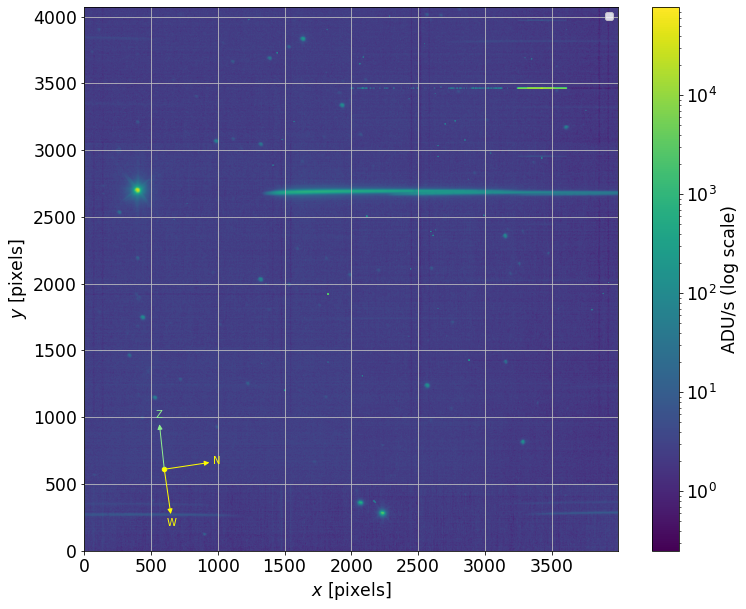

In [88]:
image.plot_image(figsize=(12, 10),scale="log")

2021-03-30 18:31:45  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                c0_1       
    ----------------- ------------------- -------------------
    4.870247129600533 0.01468500973178779 0.02774951944235044
2021-03-30 18:31:45  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 10 iterations because the relative change of cost is below ftol=1.25e-05.


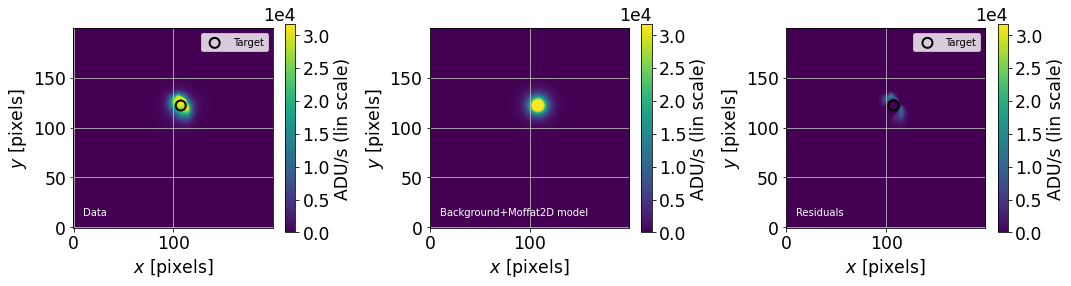

2021-03-30 18:31:46  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 4 iterations because the relative change of cost is below ftol=5e-05.


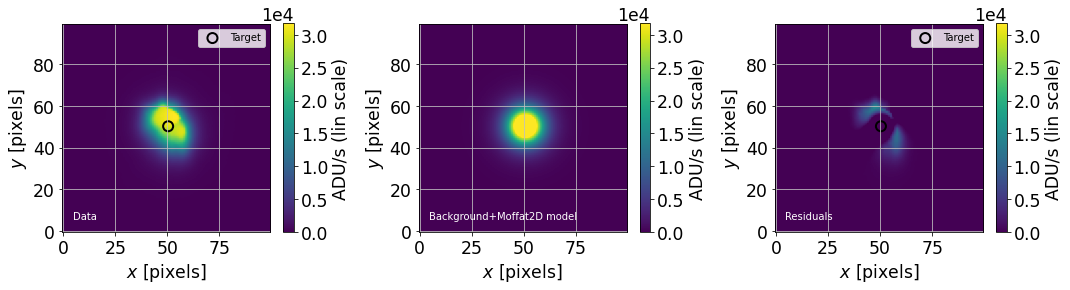

2021-03-30 18:31:47  Image      find_target          INFO   
	X,Y target position in pixels: 407.398,2722.216


In [78]:
#guess = [250, 2600]
#guess = [2000, 2800]
guess = [400, 2700]
parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [89]:
print(x1,y1)

407.39781050726026 2722.2164076696595


# Go for spectrum reconstruction

2021-03-30 18:35:06  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR
2021-03-30 18:35:06  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_empty_HD60753_2021-02-18_582.fits...
2021-03-30 18:35:06  Image      load_AUXTEL_image    INFO   
	Image loaded


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-03-30 18:35:06  Image      load_image           INFO   
	Loading disperser holo4_003...
2021-03-30 18:35:06  Hologram   load_specs           INFO   
	Load disperser holo4_003:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/holo4_003
2021-03-30 18:35:06  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 100.00 +/- 1.00 grooves/mm
	Average tilt of 0.0 degrees
2021-03-30 18:35:10  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.315372257450537 but average of self.read_out_noise is 8.5.
2021-03-30 18:35:11  Star       load                 INFO   
	Simbad:
 MAIN_ID        RA           DEC      ... PM_ERR_ANGLE_11 Z_VALUE_11
             "h:m:s"       "d:m:s"    ...       deg                 
--------- ------------- ------------- ... --------------- ----------
HD  60753 07 33 27.3190 -50 35 03.311 ...              90  0.0000650

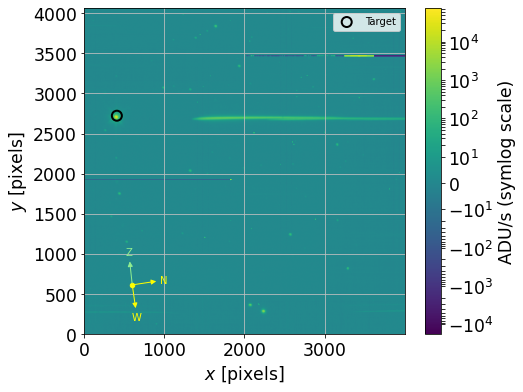

2021-03-30 18:35:14  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 407.39781051 2722.21640767]...
2021-03-30 18:35:14  spectractor.extractor.images find_target          INFO   
	No WCS /Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans/Cor_holo4_003_empty_HD60753_2021-02-18_582_wcs/Cor_holo4_003_empty_HD60753_2021-02-18_582.wcs available, use 2D fit to find target pixel position.
2021-03-30 18:35:14  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                  c0_1        
    ----------------- --------------------- ---------------------
    14.69828702179397 -0.010084825983162527 -0.037877123910374025
2021-03-30 18:35:14  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 8 iterations because the relative change of cost is below ftol=1.25e-05.


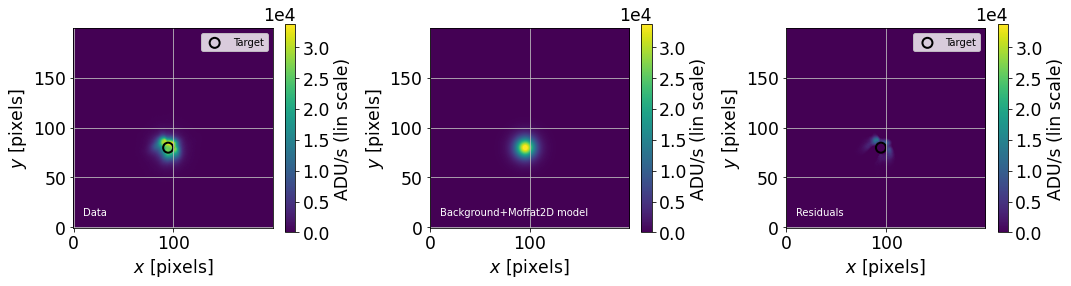

2021-03-30 18:35:15  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 4 iterations because the relative change of cost is below ftol=5e-05.


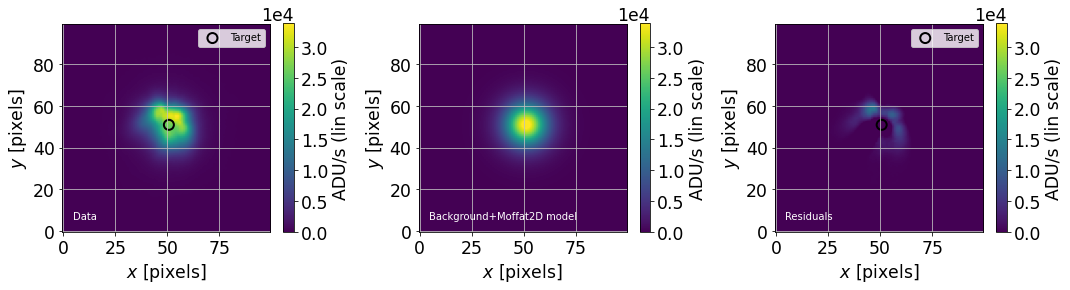

2021-03-30 18:35:16  Image      find_target          INFO   
	X,Y target position in pixels: 401.758,2701.898


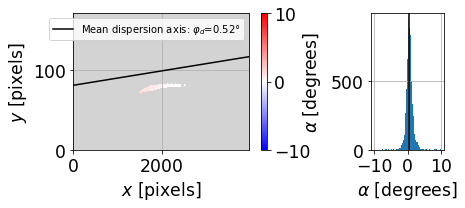

2021-03-30 18:35:17  Image      turn_image           INFO   
	Rotate the image with angle theta=0.52 degree
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


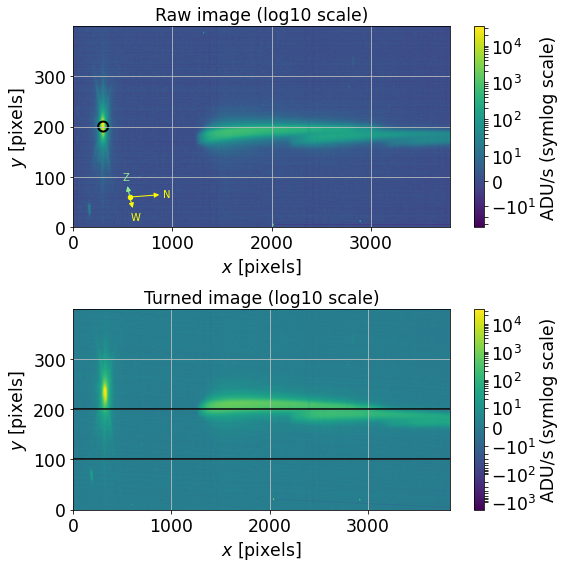

2021-03-30 18:35:28  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-03-30 18:35:28  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0              c1_0                c0_1       
    ----------------- ------------------ -------------------
    43.66537717695459 0.1138679473079602 0.06254136096129666
2021-03-30 18:35:28  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 17 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.


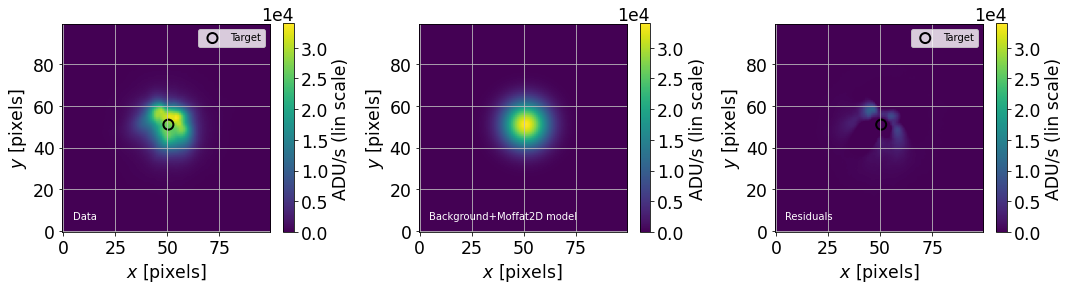

2021-03-30 18:35:29  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 18 iterations because the sum of parameter shift relative to the sum of the parameters is below xtol=1e-06.


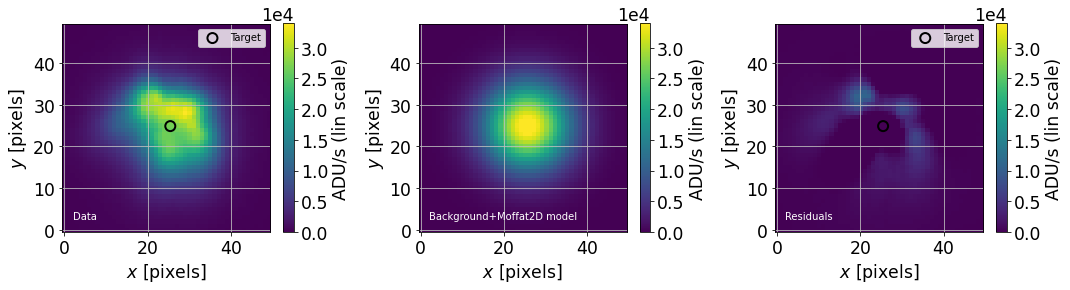

2021-03-30 18:35:29  Image      find_target          INFO   
	X,Y target position in pixels: 426.470,2734.892
2021-03-30 18:35:29  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-03-30 18:35:29  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-03-30 18:35:30  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [952:2363,2554:2914] (size (1411, 360))


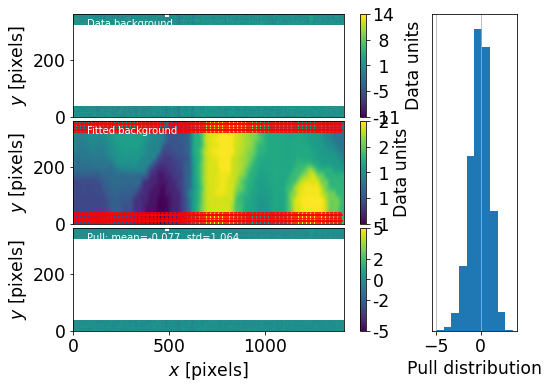

2021-03-30 18:35:32  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
2021-03-30 18:35:46  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-41.81469231105216).
2021-03-30 18:35:46  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (180.0).
2021-03-30 18:35:46  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma has a null Jacobian; parameter is fixed at its last known current value (3.0).
2021-03-30 18:35:46  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha has a null Jacobian; parameter is fixed at its last known current value (2.0).
2021-03-30 18:35:46  spectractor.fit.fitter gradient_descent     WARNING 
	Gradient descent terminated in 0 iterations because all parameters have null Jacobian.
2021-03-30 18:35:46  spectr

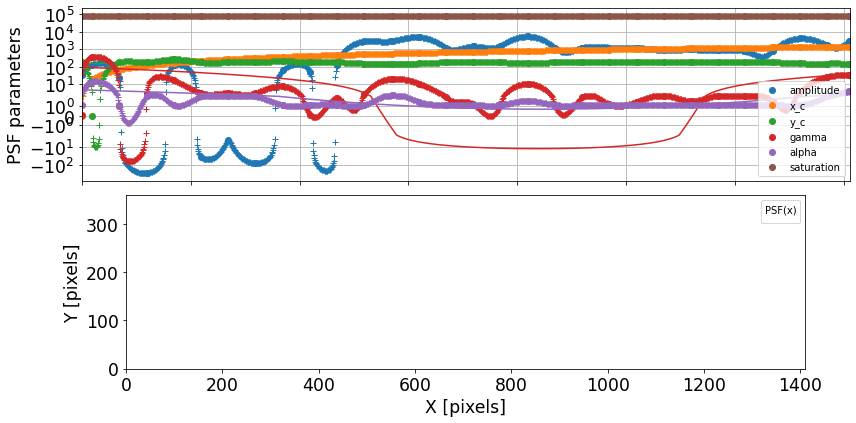

2021-03-30 18:35:52  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=1.8127e+06 initial chisq_red=32.116
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [ -7.45743154   6.42727841  -5.29626346 -22.94604023  48.62181593
 -42.76678463  -2.25591565   5.12493954  -4.47015287]
	New parameters: [-40.81670254  39.2755337  -33.09125251  -7.32233273  31.2823065
 -28.17805529  -0.46527624   4.22065517  -3.74417221]
	Final cost=1.0271e+06 final chisq_red=18.199 computed in 1.37s
2021-03-30 18:35:54  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=1.0271e+06 initial chisq_red=18.199
		 Line search: alpha_min=3.93 iter=1 funcalls=7
	Parameter shifts: [ 24.56042938 -79.20360162  69.4704271   12.54277851 -34.4124765
  31.00425114   8.52711575 -18.260526    16.05076075]
	New parameters: [-16.25627315 -39.92806792  36.37917459   5.22044578  -3.13017
   2.82619585   8.06183951 -14.03987083  12.30658854]
	Final cost=3.3621e+05

2021-03-30 18:36:18  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=17: initial cost=38074 initial chisq_red=0.67459
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [-0.13379927 -0.15934562  0.26401118  0.01433606 -0.01605414  0.0348788
  0.00691613 -0.00932113  0.01489813]
	New parameters: [-20.8584094  -45.62409522  45.76319143   2.76188471   3.81080038
  -3.59725313   0.92299685   0.79881847  -0.63796948]
	Final cost=38071 final chisq_red=0.67454 computed in 1.35s
2021-03-30 18:36:19  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=18: initial cost=38071 initial chisq_red=0.67454
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [-0.13533406 -0.15762713  0.32321832 -0.01523117  0.0181676  -0.03627954
 -0.0071034   0.00978511 -0.01519   ]
	New parameters: [-20.99374346 -45.78172235  46.08640976   2.74665355   3.82896798
  -3.63353267   0.91589345   0.80860357  -0.65315948]
	Final cost=38070 final chisq_red=0.67452 compute

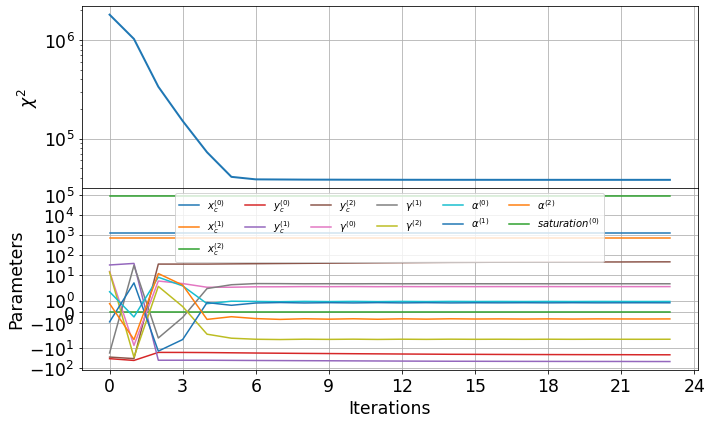

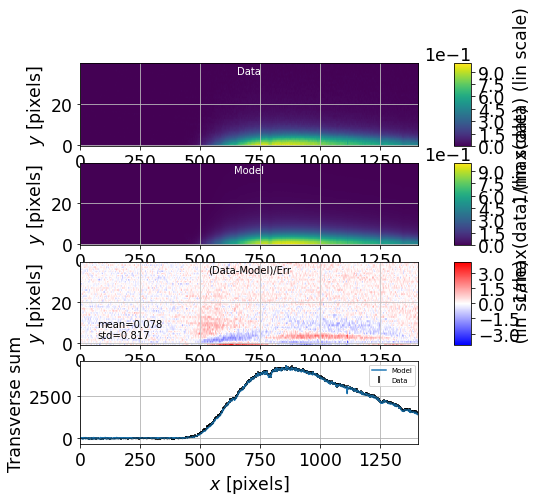

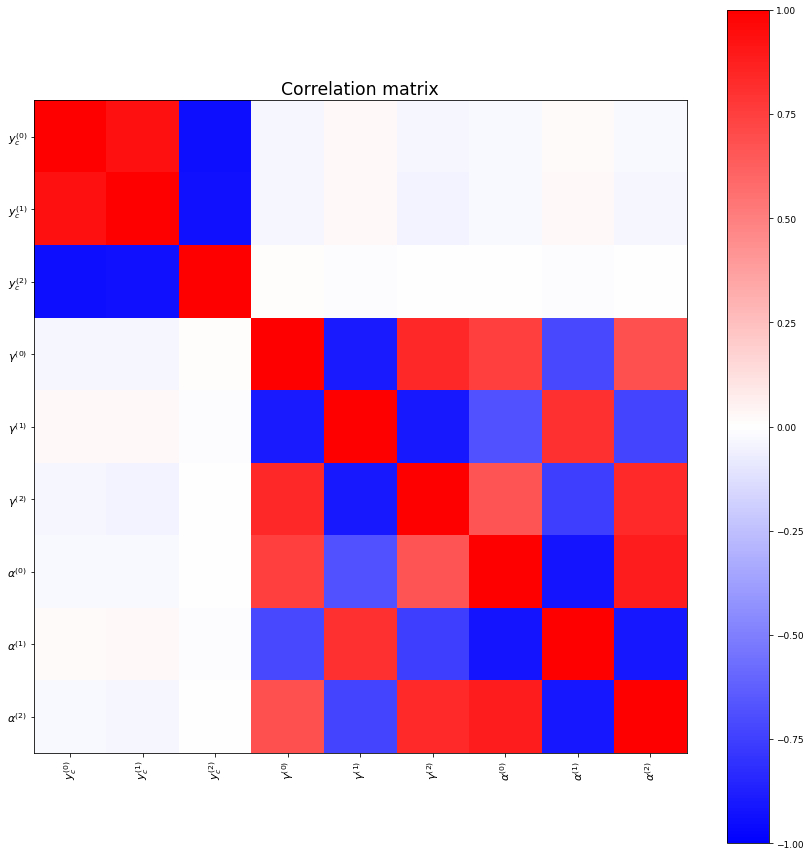

2021-03-30 18:36:29  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
     amplitude       x_c   ...          Dy         Dy_disp_axis
------------------- ------ ... ------------------- ------------
 6202.2114622385425    0.0 ...    71.9935598942011          0.0
 171538.74219998042    1.0 ...    71.7277290270739          0.0
   72015.6420022183    2.0 ...   71.46218216673506          0.0
  53459.71302338312    3.0 ...   71.19691931318457          0.0
-235826.04453003692    4.0 ...   70.93194046642247          0.0
  30005.48224237793    5.0 ...   70.66724562644868          0.0
 -45742.94610491592    6.0 ...    70.4028347932632          0.0
 -25934.16064834305    7.0 ...    70.1387079668661          0.0
 -206512.4506748733    8.0 ...   69.87486514725737          0.0
 -321386.4220046217    9.0 ...   69.61130633443696          0.0
                ...    ... ...                 ...          ...
   2837.25567123603 1400.0 ... -22.041

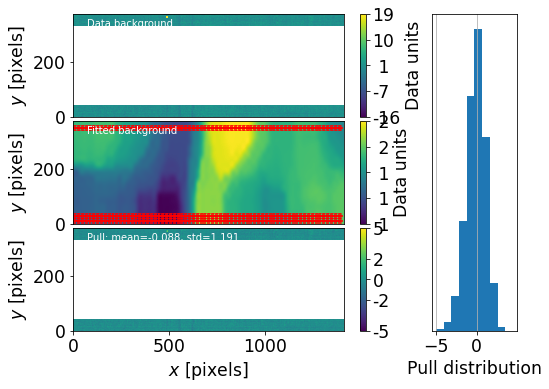

2021-03-30 18:36:32  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=1.428 ADU/s, RMS=4.413 ADU/s.
2021-03-30 18:36:32  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [926:2337,2525:2899] (size (1411, 374))
	New target position in spectrogram frame: [-524.2416263093694, 176.8979290213174]


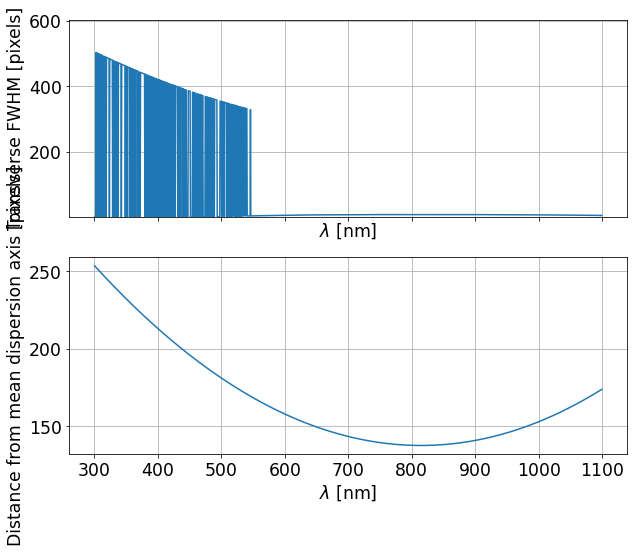

/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


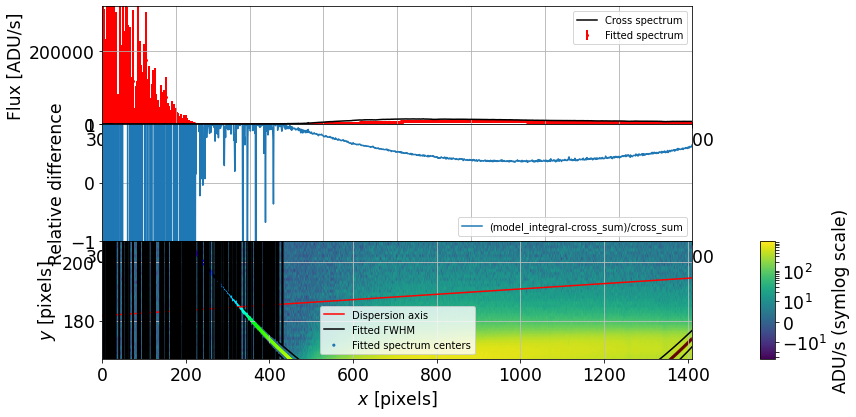

2021-03-30 18:36:33  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


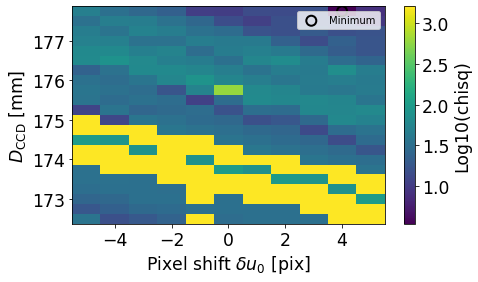

TypeError: Cannot convert list to iminuit._libiminuit.ErrorView

In [90]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)